In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import histlite as hl
import csky as cy

import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots_nb.mplstyle')
#palette = sns.color_palette('Dark2')
palette = sns.color_palette('Paired')

In [3]:
timer = cy.timing.Timer()
time = timer.time

## Begin with the offline sample. Iterate over declination, gamma, and time window

In [10]:
sinDecs = [-0.5, 0.0, 0.5]
inj_gamma = [2.0, 2.5, 3.0]
delta_ts = np.logspace(3., 7., 9)[::]

if os.path.exists('/data/user/apizzuto/fast_response_skylab/offline_vs_online_gfu/dump/gfu_offline_transient_sens_100tev.pkl'):
    with open('./dump/gfu_offline_transient_sens_100tev.pkl', 'rb') as f:
        all_gamma_results = pickle.load(f)
else:
    ana_dir = cy.utils.ensure_dir('/data/user/apizzuto/csky_cache/')
    with time('ana setup'):
        ana = cy.get_analysis(
            cy.selections.repo,
            'version-002-p05', cy.selections.GFUDataSpecs.GFU_IC86,
            dir=ana_dir)
    conf = {'extended': True,
           'space': "ps",
            'time': "transient",
            'sig': 'transient',
           }
    cy.CONF['mp_cpus'] = 5

    all_gamma_results = dict()

    for gamma in inj_gamma[:1]:
        all_gamma_results[gamma] = dict()
        for sd in sinDecs[:]:
            results = dict(sens_n = [],
                      sens_e2dnde = [],
                      disc_n = [],
                      disc_e2dnde = [],
                      delta_t = [])
            dec = np.arcsin(sd)
            for delta_t in delta_ts:
                src = cy.utils.Sources(ra=0.0,
                                       dec=dec,
                                       mjd=57000.,
                                       sigma_t=0.,
                                       t_100=delta_t/86400.)
                cy.CONF['src'] = src

                tr = cy.get_trial_runner(conf, ana=ana, src=src)
                bg = cy.dists.Chi2TSD(tr.get_many_fits(10000))

                tr = cy.get_trial_runner(conf, ana=ana, src=src,
                                         inj_conf={'flux': cy.hyp.PowerLawFlux(gamma)})

                sensitivity = tr.find_n_sig(bg.median(), 0.9,
                                       batch_size=1000,
                                       n_sig_step=0.25,
                                       #max_batch_size=0,
                                       logging=True,
                                       n_bootstrap=1, tol=.05)

                thresh_ts = bg.isf_nsigma(5.)
                discovery = tr.find_n_sig(thresh_ts, 0.5,
                                       batch_size=1000,
                                       n_sig_step=0.25,
                                       #max_batch_size=0,
                                       logging=True,
                                       n_bootstrap=1, tol=.05)

                results['sens_n'].append(sensitivity['n_sig'])
                results['disc_n'].append(discovery['n_sig'])
                results['sens_e2dnde'].append(tr.to_E2dNdE(sensitivity, E0=100, unit=1e3))
                results['disc_e2dnde'].append(tr.to_E2dNdE(discovery['n_sig'], E0=100, unit=1e3))
                results['delta_t'].append(delta_t)

            all_gamma_results[gamma][sd] = results
            
    with open('./dump/gfu_offline_transient_sens_100tev.pkl', 'wb') as f:
        pickle.dump(all_gamma_results, f)

Performing 5000 background trials using 5 cores:
       5000/5000 trials complete.   
Start time: 2020-11-12 10:31:16.288631
Using 5 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 0.250 ... frac = 0.28000
  n_sig = 0.500 ... frac = 0.28000
  n_sig = 0.750 ... frac = 0.54000
  n_sig = 1.000 ... frac = 0.58000
  n_sig = 1.250 ... frac = 0.78000
  n_sig = 1.500 ... frac = 0.66000
  n_sig = 1.750 ... frac = 0.84000
  n_sig = 2.000 ... frac = 0.88000
  n_sig = 2.250 ... frac = 0.92000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    0.90    1.80    2.70    3.60    4.50  |  n_sig(relative error)
500      |          0.2%   61.0%   83.6%   93.4%   97.6%   98.8%  |      2.299 (+/-  0.0%) [spline]
End time: 2020-11-12 10:31:30.731629
Elapsed time: 0:00:14.442998
Start time: 2020-11-12 10:31:30.735632
Using 5 cores.
* Starting initial scan for 50% of 50 trials with TS >= 44.564...
  n_sig = 0.250 ... frac = 0.00000
  n_sig = 0.500 ... frac = 0.0

  n_sig = 2.750 ... frac = 0.32000
  n_sig = 3.000 ... frac = 0.32000
  n_sig = 3.250 ... frac = 0.28000
  n_sig = 3.500 ... frac = 0.46000
  n_sig = 3.750 ... frac = 0.50000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    1.50    3.00    4.50    6.00    7.50  |  n_sig(relative error)
500      |          0.0%    7.2%   29.0%   60.6%   76.2%   89.6%  |      3.946 (+/-  0.0%) [spline]
End time: 2020-11-12 10:34:36.145732
Elapsed time: 0:00:20.764040
Performing 5000 background trials using 5 cores:
       5000/5000 trials complete.   
Start time: 2020-11-12 10:34:44.023802
Using 5 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 0.250 ... frac = 0.30000
  n_sig = 0.500 ... frac = 0.42000
  n_sig = 0.750 ... frac = 0.54000
  n_sig = 1.000 ... frac = 0.54000
  n_sig = 1.250 ... frac = 0.70000
  n_sig = 1.500 ... frac = 0.72000
  n_sig = 1.750 ... frac = 0.80000
  n_sig = 2.000 ... frac = 0.86000
  n_sig = 2.250 ... frac = 0.94000
* Generati

       5000/5000 trials complete.   
Start time: 2020-11-12 10:40:27.708123
Using 5 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 0.250 ... frac = 0.06000
  n_sig = 0.500 ... frac = 0.44000
  n_sig = 0.750 ... frac = 0.54000
  n_sig = 1.000 ... frac = 0.52000
  n_sig = 1.250 ... frac = 0.72000
  n_sig = 1.500 ... frac = 0.78000
  n_sig = 1.750 ... frac = 0.88000
  n_sig = 2.000 ... frac = 0.86000
  n_sig = 2.250 ... frac = 0.94000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    0.90    1.80    2.70    3.60    4.50  |  n_sig(relative error)
500      |          0.6%   57.2%   83.0%   90.4%   96.2%   99.0%  |      2.643 (+/-  0.0%) [spline]
End time: 2020-11-12 10:40:44.375823
Elapsed time: 0:00:16.667700
Start time: 2020-11-12 10:40:44.379480
Using 5 cores.
* Starting initial scan for 50% of 50 trials with TS >= 69.843...
  n_sig = 0.250 ... frac = 0.00000
  n_sig = 0.500 ... frac = 0.00000
  n_sig = 0.750 ... frac = 0.00000
  n_sig =

  n_sig = 2.750 ... frac = 0.36000
  n_sig = 3.000 ... frac = 0.42000
  n_sig = 3.250 ... frac = 0.42000
  n_sig = 3.500 ... frac = 0.54000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    1.40    2.80    4.20    5.60    7.00  |  n_sig(relative error)
500      |          0.0%   11.4%   34.8%   66.6%   77.4%   91.4%  |      3.423 (+/-  0.0%) [spline]
End time: 2020-11-12 10:44:24.731544
Elapsed time: 0:00:22.794320
Performing 5000 background trials using 5 cores:
       5000/5000 trials complete.   
Start time: 2020-11-12 10:44:36.824255
Using 5 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 0.250 ... frac = 0.54000
  n_sig = 0.500 ... frac = 0.62000
  n_sig = 0.750 ... frac = 0.70000
  n_sig = 1.000 ... frac = 0.74000
  n_sig = 1.250 ... frac = 0.82000
  n_sig = 1.500 ... frac = 0.84000
  n_sig = 1.750 ... frac = 0.90000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    0.70    1.40    2.10    2.80    3.50  |  n_sig(re

Using 5 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 0.250 ... frac = 0.16000
  n_sig = 0.500 ... frac = 0.42000
  n_sig = 0.750 ... frac = 0.54000
  n_sig = 1.000 ... frac = 0.58000
  n_sig = 1.250 ... frac = 0.70000
  n_sig = 1.500 ... frac = 0.70000
  n_sig = 1.750 ... frac = 0.76000
  n_sig = 2.000 ... frac = 0.84000
  n_sig = 2.250 ... frac = 0.84000
  n_sig = 2.500 ... frac = 0.92000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    1.00    2.00    3.00    4.00    5.00  |  n_sig(relative error)
500      |          1.4%   58.4%   82.4%   93.2%   96.6%   99.6%  |      2.592 (+/-  0.0%) [spline]
End time: 2020-11-12 10:58:29.708701
Elapsed time: 0:00:17.107114
Start time: 2020-11-12 10:58:29.712976
Using 5 cores.
* Starting initial scan for 50% of 50 trials with TS >= 45.134...
  n_sig = 0.250 ... frac = 0.00000
  n_sig = 0.500 ... frac = 0.00000
  n_sig = 0.750 ... frac = 0.00000
  n_sig = 1.000 ... frac = 0.06000
  n_sig = 1.250

n_trials | n_inj    0.00    1.40    2.80    4.20    5.60    7.00  |  n_sig(relative error)
500      |          0.0%    7.2%   27.0%   55.0%   74.8%   86.8%  |      3.927 (+/-  0.0%) [spline]
End time: 2020-11-12 11:01:52.578093
Elapsed time: 0:00:22.683531
Performing 5000 background trials using 5 cores:
       5000/5000 trials complete.   
Start time: 2020-11-12 11:02:03.736060
Using 5 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 0.250 ... frac = 0.46000
  n_sig = 0.500 ... frac = 0.46000
  n_sig = 0.750 ... frac = 0.60000
  n_sig = 1.000 ... frac = 0.58000
  n_sig = 1.250 ... frac = 0.76000
  n_sig = 1.500 ... frac = 0.80000
  n_sig = 1.750 ... frac = 0.82000
  n_sig = 2.000 ... frac = 0.84000
  n_sig = 2.250 ... frac = 0.82000
  n_sig = 2.500 ... frac = 0.82000
  n_sig = 2.750 ... frac = 0.94000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    1.10    2.20    3.30    4.40    5.50  |  n_sig(relative error)
500      |         32.6%

  n_sig = 5.250 ... frac = 0.14000
  n_sig = 5.500 ... frac = 0.14000
  n_sig = 5.750 ... frac = 0.16000
  n_sig = 6.000 ... frac = 0.20000
  n_sig = 6.250 ... frac = 0.30000
  n_sig = 6.500 ... frac = 0.22000
  n_sig = 6.750 ... frac = 0.22000
  n_sig = 7.000 ... frac = 0.22000
  n_sig = 7.250 ... frac = 0.22000
  n_sig = 7.500 ... frac = 0.28000
  n_sig = 7.750 ... frac = 0.36000
  n_sig = 8.000 ... frac = 0.32000
  n_sig = 8.250 ... frac = 0.46000
  n_sig = 8.500 ... frac = 0.44000
  n_sig = 8.750 ... frac = 0.40000
  n_sig = 9.000 ... frac = 0.46000
  n_sig = 9.250 ... frac = 0.52000
* Generating batches of 500 trials...
n_trials | n_inj    0.00    3.70    7.40   11.10   14.80   18.50  |  n_sig(relative error)
500      |          0.0%    4.2%   29.4%   63.4%   81.6%   93.4%  |      9.540 (+/-  0.0%) [spline]
End time: 2020-11-12 11:14:04.487041
Elapsed time: 0:02:53.979292


In [11]:
def conv_ref_en(fl, e1, e0, gamma):
    return np.asarray(fl) * (e1/e0)**(2.-gamma)

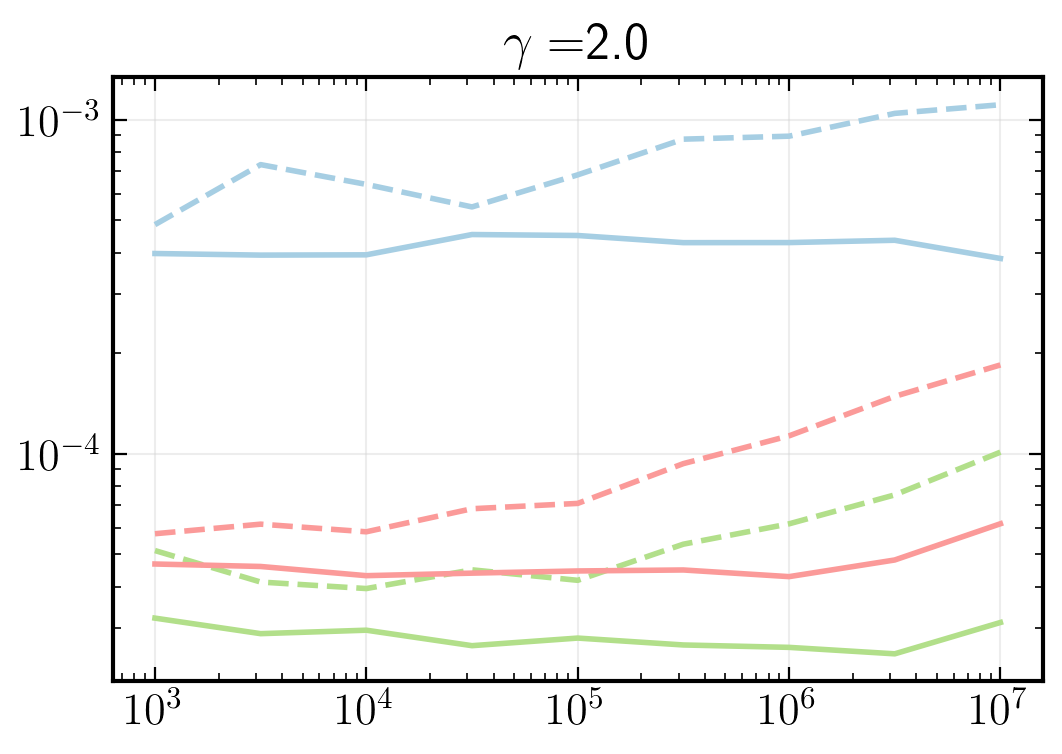

KeyError: 2.5

<Figure size 1200x800 with 0 Axes>

In [12]:
for gamma in inj_gamma:
    fig = plt.figure(dpi=200)
    for ii, sd in enumerate(all_gamma_results[gamma].keys()):
        one_tev_sens = conv_ref_en(all_gamma_results[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        plt.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii], lw=2., ls='-')
        plt.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii], lw=2., ls='--')
    
    plt.yscale('log')
    plt.title(r'$\gamma =$' + f'{gamma}')
    plt.xscale('log')
    plt.show()

## Now with GFUOnline
Start by making a GFUOnline DataSpecs object because it isn't included in csky by default

In [ ]:
class GFUOnlineDataSpecs(object):
    class GFUOnlineDataSpec(cy.selections.TrackSpec):
        _bins_sindec = np.unique(np.concatenate([
             np.linspace(-1, -0.93, 4 + 1),
             np.linspace(-0.93, -0.3, 10 + 1),
             np.linspace(-0.3, 0.05, 9 + 1),
             np.linspace(0.05, 1, 18 + 1) ]))
        _bins_logenergy = np.arange(1, 9.5 + 0.01, 0.125)
        def dataset_modifications(self, ds):
            max_sigma = np.radians(15)
            ds.data = ds.data[ds.data.sigma < max_sigma]
            ds.sig = ds.sig[ds.sig.sigma < max_sigma]
            #ds.data.sigma = np.minimum(ds.data.sigma, max_sigma)
            #ds.sig.sigma = np.minimum(ds.sig.sigma, max_sigma)

    class GFUOnline_IC86 (GFUOnlineDataSpec):
        _path_sig = 'gfu_online/{version}/IC86_2011_MC.npy'
        _path_data = ['gfu_online/{{version}}/IC86_201{}_data.npy'.format(i) for i in range(1,9)]
        _path_grls = ['gfu_online/{{version}}/GRL/IC86_201{}_data.npy'.format(i) for i in range(1,9)]
        def __init__(self, years=list(map(str, 2010 + np.arange(1, 9)))):
            self.path_data = ['gfu_online/{{version}}/IC86_{}_data.npy'.format(y) for y in years]
            self.path_grls = ['gfu_online/{{version}}/GRL/IC86_{}_data.npy'.format(y) for y in years]
            self._key = 'GFUOnline_for_' + '_'.join(years)

    gfuonline_IC86 = [GFUOnline_IC86]

In [ ]:
sinDecs = [-0.5, 0.0, 0.5]
inj_gamma = [2.0, 2.5, 3.0]
delta_ts = np.logspace(3., 7., 9)

if os.path.exists('/data/user/apizzuto/fast_response_skylab/offline_vs_online_gfu/dump/gfu_online_transient_sens_100tev.pkl'):
    with open('./dump/gfu_online_transient_sens_100tev.pkl', 'rb') as f:
        all_gamma_results_online = pickle.load(f)
else:
    ana_dir = cy.utils.ensure_dir('/data/user/apizzuto/csky_cache/')
    with time('ana setup'):
        ana = cy.analysis.Analysis(cy.selections.repo, [GFUOnlineDataSpecs.GFUOnline_IC86])
    conf = {'extended': True,
           'space': "ps",
            'time': "transient",
            'sig': 'transient',
           }
    cy.CONF['mp_cpus'] = 5

    all_gamma_results_online = dict()

    for gamma in inj_gamma:
        all_gamma_results_online[gamma] = dict()
        for sd in sinDecs:
            results = dict(sens_n = [],
                      sens_e2dnde = [],
                      disc_n = [],
                      disc_e2dnde = [],
                      delta_t = [])
            dec = np.arcsin(sd)
            for delta_t in delta_ts:
                src = cy.utils.Sources(ra=0.0,
                                       dec=dec,
                                       mjd=57000.,
                                       sigma_t=0.,
                                       t_100=delta_t/86400.)
                cy.CONF['src'] = src

                tr = cy.get_trial_runner(conf, ana=ana, src=src)
                bg = cy.dists.Chi2TSD(tr.get_many_fits(10000))

                tr = cy.get_trial_runner(conf, ana=ana, src=src,
                                         inj_conf={'flux': cy.hyp.PowerLawFlux(gamma)})

                sensitivity = tr.find_n_sig(bg.median(), 0.9,
                                       batch_size=1000,
                                       n_sig_step=0.25,
                                       #max_batch_size=0,
                                       logging=False,
                                       n_bootstrap=1, tol=0.05)

                thresh_ts = bg.isf_nsigma(5.)
                discovery = tr.find_n_sig(thresh_ts, 0.5,
                                       batch_size=1000,
                                       n_sig_step=0.25,
                                       #max_batch_size=0,
                                       logging=False,
                                       n_bootstrap=1, tol=0.05)

                results['sens_n'].append(sensitivity['n_sig'])
                results['disc_n'].append(discovery['n_sig'])
                results['sens_e2dnde'].append(tr.to_E2dNdE(sensitivity, E0=100, unit=1e3))
                results['disc_e2dnde'].append(tr.to_E2dNdE(discovery['n_sig'], E0=100, unit=1e3))
                results['delta_t'].append(delta_t)

            all_gamma_results_online[gamma][sd] = results
    with open('./dump/gfu_online_transient_sens_100tev.pkl', 'wb') as f:
        pickle.dump(all_gamma_results_online, f)

In [ ]:
for gamma in inj_gamma:
    fig = plt.figure(dpi=200)
    for ii, sd in enumerate(all_gamma_results_online[gamma].keys()):
        one_tev_sens = conv_ref_en(all_gamma_results_online[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results_online[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        plt.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii+1], lw=2., ls='-')
        plt.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii+1], lw=2., ls='--')
    
    plt.yscale('log')
    plt.title(r'$\gamma =$' + f'{gamma}')
    plt.xscale('log')
    plt.show()

## Now, for each spectrum, plot the comparions between online and offline

In [ ]:
for gamma in inj_gamma:
    fig = plt.figure(dpi=200)
    spec = mpl.gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[4, 1.5])
    ax1 = fig.add_subplot(spec[1])
    ax0 = fig.add_subplot(spec[0], sharex=ax1)
    spec.update(wspace=0.025, hspace=0.025)
    fig.set_facecolor('w')

    for ii, sd in enumerate(all_gamma_results_online[gamma].keys()):
        one_tev_sens = conv_ref_en(all_gamma_results[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        ax0.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii], lw=1.25, ls='-')
        ax0.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii], lw=1.25, ls='--')
        
        one_tev_sens_online = conv_ref_en(all_gamma_results_online[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc_online = conv_ref_en(all_gamma_results_online[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        ax0.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii+1], lw=1.25, ls='-')
        ax0.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii+1], lw=1.25, ls='--')
        
        ax1.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_sens_online / one_tev_sens,
                color=palette[2*ii+1], lw=1.5, ls='-')
        ax1.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_disc_online / one_tev_disc,
                color=palette[2*ii+1], lw=1.5, ls='--')
        
    handles, labels = ax0.get_legend_handles_labels()
    patch = Line2D([0], [0], color='grey', lw=1.5, linestyle='-', label='Sens.')
    handles.append(patch) 
    patch = Line2D([0], [0], color='grey', lw=1.5, linestyle='--', label='disc. pot.')
    handles.append(patch) 

    ax0.legend(loc=1, frameon=True, ncol=2, handles=handles, fontsize=13, columnspacing=0.3)
    ax0.set_yscale('log')
    ax0.set_xscale('log')
    #ax0.set_ylim(2e-13, 1e-7)
    #ax0.text(-0.9, 1e-12, 'Online', color=sns.xkcd_rgb['battleship grey'])
    #ax0.text(-0.9, 3e-13, 'Offline', color=sns.xkcd_rgb['battleship grey'], alpha=0.4)
    #ax1.set_ylim(0.95, 1.2)
    ax1.set_xscale('log')
    plt.setp(ax0.get_xticklabels(), visible=False)
    ax0.set_ylabel(r'$E^2\frac{dN}{dE}\Delta T\bigg|_{\mathrm{1 TeV}}$ (TeV cm$^{-2}$)', fontsize=14)
    ax1.set_xlabel(r'$\Delta T$ (s)', fontsize=14)
    ax1.set_ylabel(r'$\frac{\mathrm{online}}{\mathrm{offline}}$', fontsize=14)
    fig.suptitle("GFU Offline (v02\_p05) vs. Online (v01\_p01)" + r'$\gamma =$' + f'{gamma}', 
                 fontsize=16, y=0.94)
    #plt.tight_layout()
    plt.show()